In [15]:

import numpy as np
import matplotlib.pyplot as plt
import helpers as hp
from pathlib import Path
from config import PathConfigs
import os



In [ ]:
string = "test_var"
globals()[string] = 42

# thats cool, didnt know you could dynamically declare variables
test_var

42

: 

In [ ]:
Delta = 0.5
mu = 1.0
V_c = np.sqrt(mu**2 + Delta ** 2)


: 

In [ ]:

save_plots = True

dirname = "dis_test4"
save_dir = Path(PathConfigs.DATA/dirname/"Plots")

os.makedirs(save_dir, exist_ok=True)





: 

In [ ]:

barrier_left_conductance_left_arr = hp.np_load_wrapped("barrier_left_conductance_left_arr", dirname)
barrier_left_conductance_right_arr = hp.np_load_wrapped("barrier_left_conductance_right_arr", dirname)
barrier_right_conductance_left_arr = hp.np_load_wrapped("barrier_right_conductance_left_arr", dirname)
barrier_right_conductance_right_arr = hp.np_load_wrapped("barrier_right_conductance_right_arr", dirname)
dIdVs_left_arr = hp.np_load_wrapped("dIdVs_left_arr", dirname)
dIdVs_right_arr = hp.np_load_wrapped("dIdVs_right_arr", dirname)
energies = hp.np_load_wrapped("energies", dirname)
ldos = hp.np_load_wrapped("LDOS", dirname)
Tinvs_left = hp.np_load_wrapped("Tinvs_left", dirname)
Tinvs_right = hp.np_load_wrapped("Tinvs_right", dirname)
pdi_arr = hp.np_load_wrapped("pdi_data", dirname)

Conductance_matrix = hp.np_load_wrapped("Conductance_matrix", dirname)

gamma_sq_arr = hp.np_load_wrapped("gamma_sq_arr", dirname)

mp_arr = hp.np_load_wrapped("mp_arr", dirname)

#return [mu_pm * V_c, vz_raw, pdi_val]
#new_pdi_dat = np.asarray([[pdr[0]/V_c, pdr[1]*V_c, pdr[2]] for pdr in pdi_arr])

pdi_arr[:,2]


array([0.98973849, 0.99770613, 0.99944355, ..., 1.02741615, 1.027343  ,
       1.02629322])

: 

In [ ]:
def filter_pdi(pdis):
    for i in range(len(pdis)):
        pdi = pdis[i]
        if pdi > 2:
            pdis[i] = 1
        elif pdi < 0:
            pdis[i] = 0
            
    return pdis
    

: 

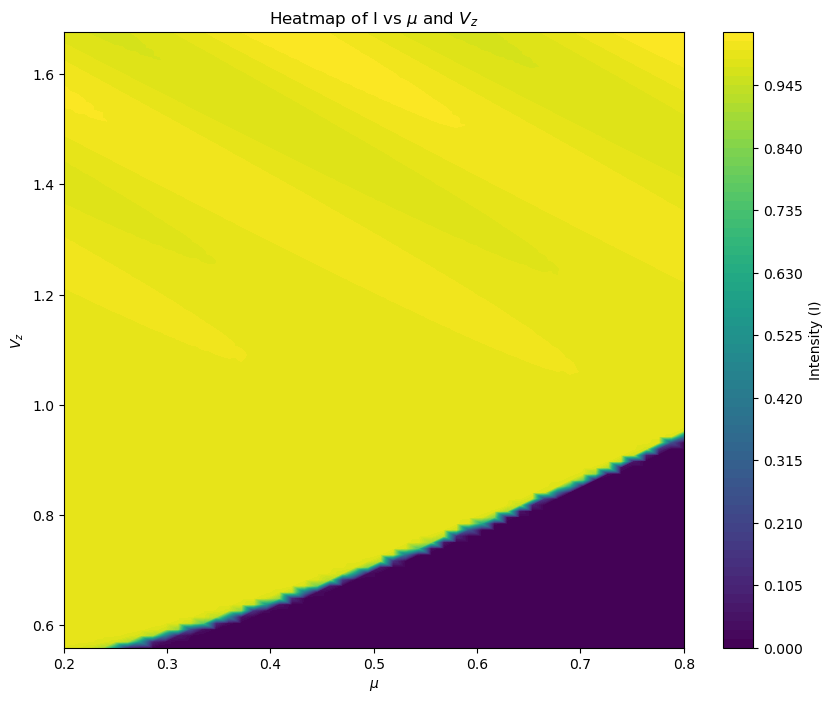

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu =  pdi_arr[:, 0]  # x-axis
V_z = pdi_arr[:, 1]  # y-axis
I =   filter_pdi(pdi_arr[:, 2])  # z-axis (color)

# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(mu, V_z, I, levels=100, cmap='viridis')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.xlabel(r'$\mu$')
plt.ylabel(r'$V_z$')
plt.title('Heatmap of I vs $\mu$ and $V_z$')

plt.show()

In [ ]:
vc = np.sqrt(0.5**2 + 0.65**2)

vc

0.8200609733428363

: 

In [ ]:
mu = 1
Delta = 0.5
V_c = np.sqrt(mu**2 + Delta**2)
num_vz_var = mp_arr.shape[0]
Vz_var = np.linspace(0.3, 1.7, num_vz_var) 
Vzs = V_c * Vz_var


: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


len dIdVs_left_arr: (100, 101)
len Vzs: 100
len energies: 101


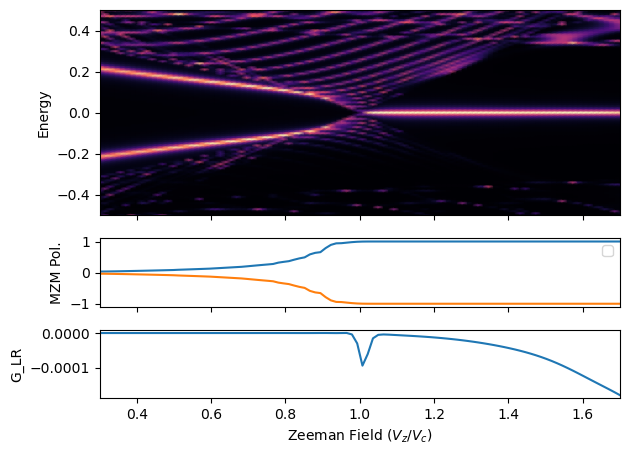

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous data generation code: energies, Vz_var, dIdVs_left_arr, etc.) ...

print(f"len dIdVs_left_arr: {dIdVs_left_arr.shape}")
print(f"len Vzs: {len(Vz_var)}")  # Adjusted variable name based on your meshgrid usage
print(f"len energies: {len(energies)}")

# Prepare Grid
Y, X = np.meshgrid(energies, Vz_var)
Z = dIdVs_left_arr

# Update: 3 rows, height ratios [3, 1, 1] to make ax2 and ax3 equal size
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- Plot 1: Heatmap ---
mesh = ax1.pcolormesh(X, Y, Z, cmap='magma', shading='gouraud')
ax1.set_ylabel("Energy") 

# --- Plot 2: MZM Polarization (Top Line Plot) ---
ax2.plot(Vz_var, mp_arr[:, 0])
ax2.plot(Vz_var, mp_arr[:, -1])
ax2.set_ylabel("MZM Pol.")
ax2.legend() # Optional: added legend since there are two lines

# --- Plot 3: New Graph (Bottom Line Plot) ---
# Replace 'your_y_data' with the data you wish to plot here
ax3.plot(Vz_var, Conductance_matrix[:,0,1]) 
ax3.set_ylabel("G_LR") 
ax3.set_xlabel(r"Zeeman Field $(V_z/V_c)$") # x-label goes on the bottom-most plot

fig.suptitle(r"")
fig.tight_layout()

plt.show()

In [ ]:
Glr = Conductance_matrix[:,0,1]
#idx = np.where(Conductance_matrix[:,0,1] == np.max(Conductance_matrix[:,0,1]))
#Vz_var[idx]

sorted_glr = np.unique(Glr)
val = sorted_glr[-2]
idx = np.where(Glr == val)[0][0]

Vz_var[idx]

0.908080808080808

: 